In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# === 1. Data inlezen ===
df = pd.read_csv('bontwikkeling.csv', sep=';', skiprows=3)

# Kolomnamen opschonen
df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Unnamed: 0': 'Year',
    'Bevolking aan het begin van de periode': 'Population'
})

# Alleen numerieke rijen behouden
df = df[pd.to_numeric(df['Population'], errors='coerce').notna()]

# Omzetten naar numeriek
df['Year'] = df['Year'].astype(int)
df['Population'] = df['Population'].astype(int) / 1_000_000  # in miljoenen

# === 2. Plot met uniforme Warentuin-/mobiliteitsstijl ===
plt.figure(figsize=(8, 4))
ax = plt.gca()

# Lijn en markers
ax.plot(df['Year'], df['Population'],
        marker='o', color='tab:blue', linewidth=2)

# Titel en labels
ax.set_title("Population Growth in the Netherlands")
ax.set_xlabel("Year")
ax.set_ylabel("Population (million people)")

# Grid en asopmaak
ax.grid(True, linestyle='--', alpha=0.6)
ax.set_xticks(df['Year'])
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

# Strakkere schaal (±3% marge)
ymin, ymax = df['Population'].min() * 0.97, df['Population'].max() * 1.03
ax.set_ylim(ymin, ymax)

# Labels bij datapunten
for x, y in zip(df['Year'], df['Population']):
    ax.text(
        x, y + (ymax - ymin) * 0.015,
        f"{y:.1f}",
        ha='center', va='bottom',
        fontsize=9, fontweight='bold',
        color='tab:blue',
        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
    )

plt.tight_layout()
plt.show()






FileNotFoundError: [Errno 2] No such file or directory: 'bontwikkeling.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV inlezen: sla de eerste 3 beschrijvende regels over
df = pd.read_csv("PT trend.csv", sep=';', skiprows=3)

# Kolomnamen expliciet instellen
df.columns = [
    "Periods", "Age", "Travel motives",
    "Train_stages", "Train_distance", "Train_time",
    "BusMetro_stages", "BusMetro_distance", "BusMetro_time"
]

# Alleen rijen voor 'Travel to/from work'
df_work = df[df["Travel motives"].str.contains("Travel to/from work", case=False, na=False)].copy()

# Jaar netjes als getal (sterretje verwijderen)
df_work["Year"] = df_work["Periods"].str.extract(r"(\d{4})").astype(int)

# === FIGUUR 1: Distance per stage ===
fig1, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].plot(df_work["Year"], df_work["Train_distance"], marker='o', color='tab:blue')
axes[0].set_title("Train – Distance per stage (Work)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Distance (passenger km)")
axes[0].grid(True)

axes[1].plot(df_work["Year"], df_work["BusMetro_distance"], marker='o', color='tab:orange')
axes[1].set_title("Bus/Metro – Distance per stage (Work)")
axes[1].set_xlabel("Year")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# === FIGUUR 2: Travel time per stage ===
fig2, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].plot(df_work["Year"], df_work["Train_time"], marker='o', color='tab:blue')
axes[0].set_title("Train – Travel time per stage (Work)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Time (minutes)")
axes[0].grid(True)

axes[1].plot(df_work["Year"], df_work["BusMetro_time"], marker='o', color='tab:orange')
axes[1].set_title("Bus/Metro – Travel time per stage (Work)")
axes[1].set_xlabel("Year")
axes[1].grid(True)

plt.tight_layout()
plt.show()



ValueError: Length mismatch: Expected axis has 3 elements, new values have 9 elements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV inlezen – extra regel overslaan en correcte quotes instellen
df = pd.read_csv("PT trend.csv", sep=';', skiprows=4, quotechar='"')

print("Kolommen gedetecteerd:", df.columns.tolist())
print("Vorm van dataframe:", df.shape)
print(df.head(3))


Kolommen gedetecteerd: ['Unnamed: 0', 'Unnamed: 1', 'Modes of travel', 'Train', 'Train.1', 'Train.2', 'Bus/metro', 'Bus/metro.1', 'Bus/metro.2']
Vorm van dataframe: (39, 9)
  Unnamed: 0 Unnamed: 1 Modes of travel                                Train  \
0        NaN        NaN           Topic  Stages per person per day (average)   
1    Periods        Age  Travel motives                               number   
2      2014*      Total           Total                                 0.08   

                                  Train.1                        Train.2  \
0  Distance travelled per stage (average)  Average travel time per stage   
1                    passenger kilometres                        Minutes   
2                                   48.47                          49.73   

                             Bus/metro  \
0  Stages per person per day (average)   
1                               number   
2                                 0.12   

                              Bu

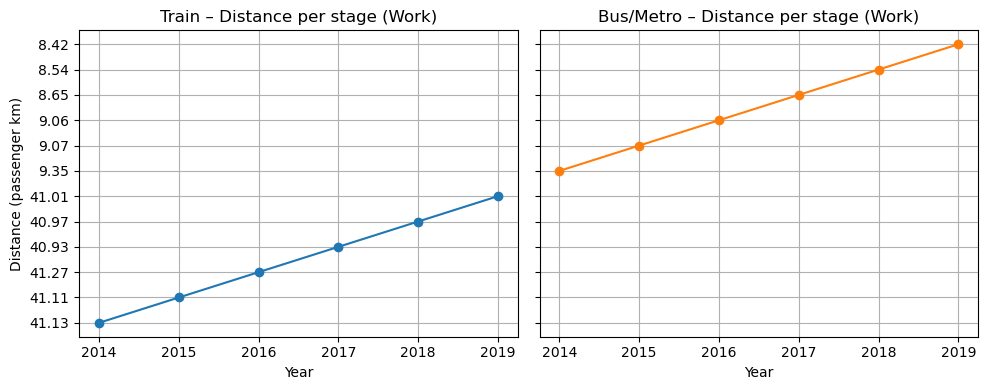

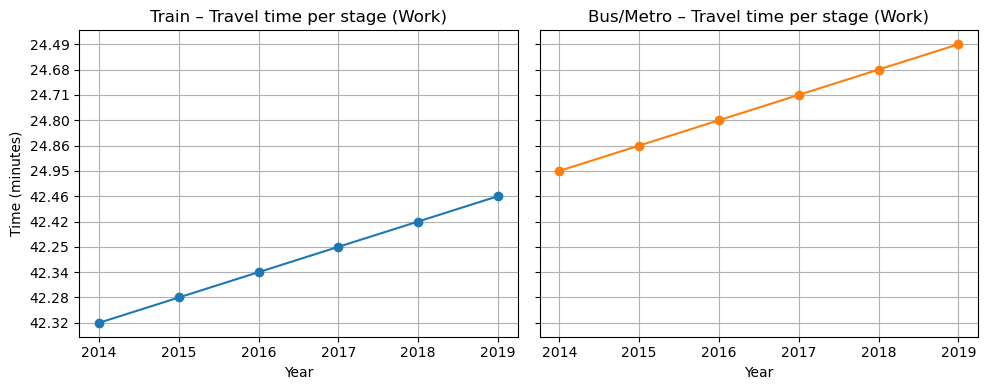

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV inlezen - oversla 5 rijen zodat de echte data begint bij Periods, Age, Travel motives
df = pd.read_csv("PT trend.csv", sep=';', skiprows=5)

# Hernoem kolommen naar duidelijke namen
df.columns = [
    "Periods", "Age", "Travel motives",
    "Train_stages", "Train_distance", "Train_time",
    "BusMetro_stages", "BusMetro_distance", "BusMetro_time"
]

# Alleen rijen voor 'Travel to/from work'
df_work = df[df["Travel motives"].str.contains("Travel to/from work", case=False, na=False)].copy()

# Jaar extraheren uit de 'Periods'-kolom
df_work["Year"] = df_work["Periods"].str.extract(r"(\d{4})").astype(int)

# === FIGUUR 1: Distance per stage ===
fig1, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].plot(df_work["Year"], df_work["Train_distance"], marker='o', color='tab:blue')
axes[0].set_title("Train – Distance per stage (Work)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Distance (passenger km)")
axes[0].grid(True)

axes[1].plot(df_work["Year"], df_work["BusMetro_distance"], marker='o', color='tab:orange')
axes[1].set_title("Bus/Metro – Distance per stage (Work)")
axes[1].set_xlabel("Year")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# === FIGUUR 2: Travel time per stage ===
fig2, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

axes[0].plot(df_work["Year"], df_work["Train_time"], marker='o', color='tab:blue')
axes[0].set_title("Train – Travel time per stage (Work)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Time (minutes)")
axes[0].grid(True)

axes[1].plot(df_work["Year"], df_work["BusMetro_time"], marker='o', color='tab:orange')
axes[1].set_title("Bus/Metro – Travel time per stage (Work)")
axes[1].set_xlabel("Year")
axes[1].grid(True)

plt.tight_layout()
plt.show()


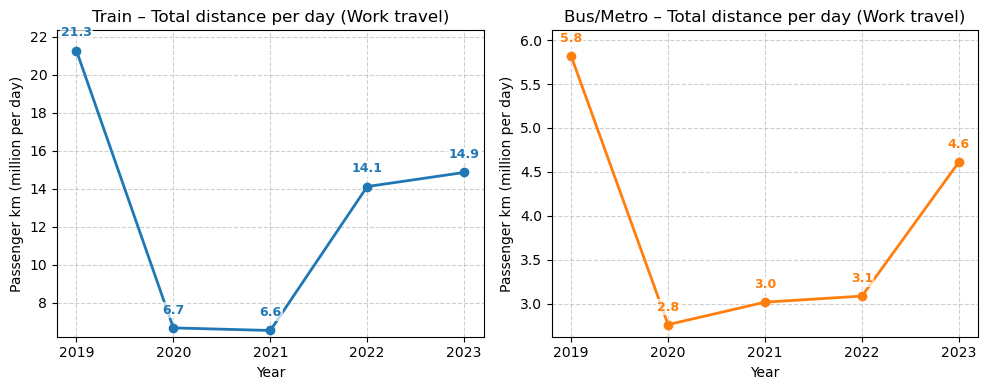

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. PT-trenddata inlezen ===
df = pd.read_csv("PT trend.csv", sep=';', skiprows=5)

# Kolommen correct instellen
df.columns = [
    "Periods", "Age", "Travel_motives",
    "Train_stages", "Train_distance", "Train_time",
    "BusMetro_stages", "BusMetro_distance", "BusMetro_time"
]

# Filter alleen woon-werkverkeer
df_work = df[df["Travel_motives"].str.contains("work", case=False, na=False)].copy()

# Jaar uit 'Periods' halen (ook bij 2019*)
df_work["Year"] = df_work["Periods"].str.extract(r"(\d{4})").astype(int)

# Zet numerieke kolommen om (komma’s vervangen door punten)
cols = ["Train_stages", "Train_distance", "BusMetro_stages", "BusMetro_distance"]
df_work[cols] = df_work[cols].apply(lambda x: x.astype(str).str.replace(",", ".")).astype(float)

# Bereken totaal per persoon per dag
df_work["Train_total_per_person"] = df_work["Train_stages"] * df_work["Train_distance"]
df_work["BusMetro_total_per_person"] = df_work["BusMetro_stages"] * df_work["BusMetro_distance"]

# === 2. Bevolkingsdata inlezen ===
pop = pd.read_csv("bontwikkeling.csv", sep=';', skiprows=4)
pop.columns = ["Year", "Population"]
pop = pop[pop["Year"].str.match(r"^\d{4}$", na=False)]
pop["Year"] = pop["Year"].astype(int)
pop["Population"] = pd.to_numeric(pop["Population"], errors="coerce")

# === 3. Samenvoegen en berekenen ===
merged = pd.merge(df_work, pop, on="Year", how="left")

# Bereken totaal aantal km per dag (in miljoenen)
merged["Train_total_km_per_day"] = merged["Train_total_per_person"] * merged["Population"] / 1_000_000
merged["BusMetro_total_km_per_day"] = merged["BusMetro_total_per_person"] * merged["Population"] / 1_000_000

# Controle: laat even zien of er data is
# Zorg dat Year integer is
merged["Year"] = merged["Year"].astype(int)

# === 4. Plot ===
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

def plot_mode(ax, x, y, title, color):
    ax.plot(x, y, marker='o', color=color, linewidth=2)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Passenger km (million per day)")
    ax.set_xticks(x.astype(int))
    ax.grid(True, linestyle='--', alpha=0.6)

    if y.notna().any():
        ymin, ymax = y.min() * 0.95, y.max() * 1.05
        ax.set_ylim(ymin, ymax)

    # Verbeterde labels
    for xi, yi in zip(x, y):
        if pd.notna(yi):
            ax.text(
                xi, yi + (y.max() - y.min()) * 0.04,  # iets hogere offset
                f"{yi:.1f}",
                ha='center', va='bottom',
                fontsize=9, fontweight='bold',
                color=color,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
            )


plot_mode(axes[0], merged["Year"], merged["Train_total_km_per_day"],
          "Train – Total distance per day (Work travel)", "tab:blue")
plot_mode(axes[1], merged["Year"], merged["BusMetro_total_km_per_day"],
          "Bus/Metro – Total distance per day (Work travel)", "tab:orange")

plt.tight_layout()
plt.show()


In [ ]:
print("Aantal rijen in df_work:", len(df_work))
print("Aantal rijen in pop:", len(pop))
print("Aantal rijen na merge:", len(merged))
print("Kolommen:", merged.columns.tolist())
print(merged.head(10))


Aantal rijen in df_work: 0
Aantal rijen in pop: 11
Aantal rijen na merge: 0
Kolommen: ['Periods', 'Age', 'Travel motives', 'Train_stages', 'Train_distance', 'Train_time', 'BusMetro_stages', 'BusMetro_distance', 'BusMetro_time', 'Year', 'Train_total_per_person', 'BusMetro_total_per_person', 'Population', 'Train_total_km_per_day', 'BusMetro_total_km_per_day']
Empty DataFrame
Columns: [Periods, Age, Travel motives, Train_stages, Train_distance, Train_time, BusMetro_stages, BusMetro_distance, BusMetro_time, Year, Train_total_per_person, BusMetro_total_per_person, Population, Train_total_km_per_day, BusMetro_total_km_per_day]
Index: []


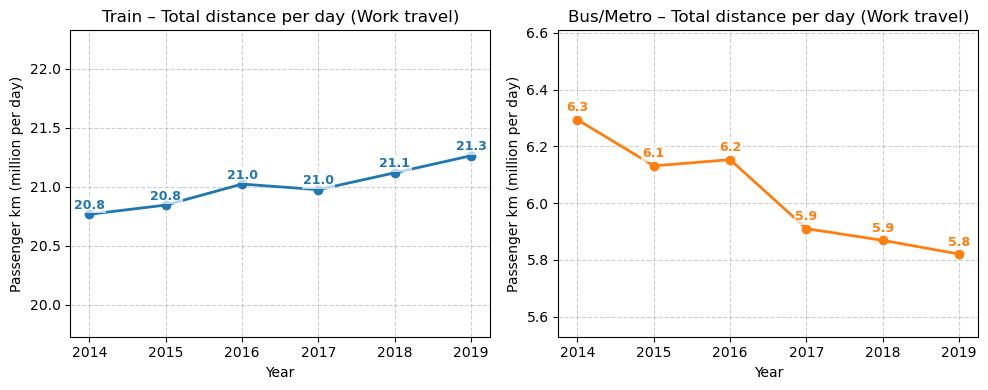

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Oude PT-trenddata (2014–2019) inlezen ===
df_before = pd.read_csv("PTbefore.csv", sep=';', skiprows=5)

# Kolommen instellen (zelfde structuur als nieuwe bestand)
df_before.columns = [
    "Periods", "Age", "Travel_motives",
    "Train_stages", "Train_distance", "Train_time",
    "BusMetro_stages", "BusMetro_distance", "BusMetro_time"
]

# Filter woon-werkverkeer
df_before_work = df_before[df_before["Travel_motives"].str.contains("work", case=False, na=False)].copy()

# Jaar uit 'Periods' halen
df_before_work["Year"] = df_before_work["Periods"].str.extract(r"(\d{4})").astype(int)

# Komma’s vervangen door punten en omzetten naar float
cols = ["Train_stages", "Train_distance", "BusMetro_stages", "BusMetro_distance"]
df_before_work[cols] = df_before_work[cols].apply(lambda x: x.astype(str).str.replace(",", ".")).astype(float)

# Bereken totaal per persoon per dag
df_before_work["Train_total_per_person"] = df_before_work["Train_stages"] * df_before_work["Train_distance"]
df_before_work["BusMetro_total_per_person"] = df_before_work["BusMetro_stages"] * df_before_work["BusMetro_distance"]

# === 2. Bevolkingsdata inlezen ===
pop = pd.read_csv("bontwikkeling.csv", sep=';', skiprows=4)
pop.columns = ["Year", "Population"]
pop = pop[pop["Year"].str.match(r"^\d{4}$", na=False)]
pop["Year"] = pop["Year"].astype(int)
pop["Population"] = pd.to_numeric(pop["Population"], errors="coerce")

# === 3. Samenvoegen en berekenen ===
merged_before = pd.merge(df_before_work, pop, on="Year", how="left")

# Bereken totaal aantal km per dag (in miljoenen)
merged_before["Train_total_km_per_day"] = (
    merged_before["Train_total_per_person"] * merged_before["Population"] / 1_000_000
)
merged_before["BusMetro_total_km_per_day"] = (
    merged_before["BusMetro_total_per_person"] * merged_before["Population"] / 1_000_000
)

# Zorg dat Year integer is
merged_before["Year"] = merged_before["Year"].astype(int)

# === 4. Plot ===
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

def plot_mode(ax, x, y, title, color):
    ax.plot(x, y, marker='o', color=color, linewidth=2)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Passenger km (million per day)")
    ax.set_xticks(x.astype(int))
    ax.grid(True, linestyle='--', alpha=0.6)

    if y.notna().any():
        ymin, ymax = y.min() * 0.95, y.max() * 1.05
        ax.set_ylim(ymin, ymax)

    for xi, yi in zip(x, y):
        if pd.notna(yi):
            ax.text(
                xi, yi + (y.max() - y.min()) * 0.04,
                f"{yi:.1f}", ha='center', va='bottom',
                fontsize=9, fontweight='bold',
                color=color,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
            )

plot_mode(axes[0], merged_before["Year"], merged_before["Train_total_km_per_day"],
          "Train – Total distance per day (Work travel)", "tab:blue")
plot_mode(axes[1], merged_before["Year"], merged_before["BusMetro_total_km_per_day"],
          "Bus/Metro – Total distance per day (Work travel)", "tab:orange")

plt.tight_layout()
plt.show()


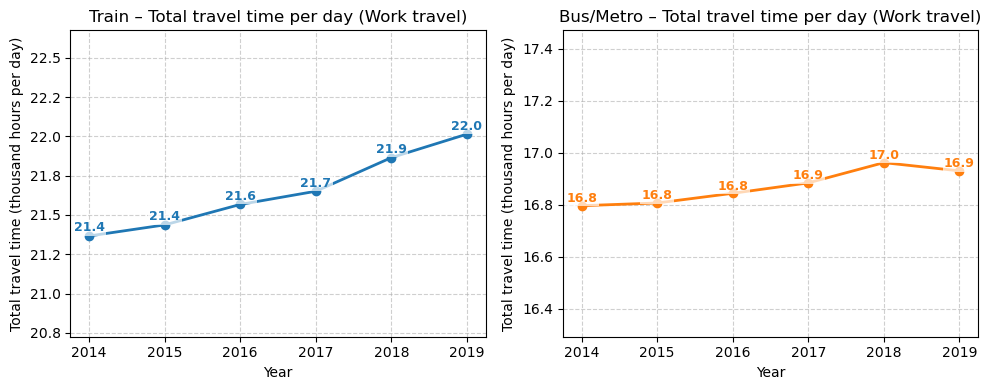

In [ ]:
import matplotlib.ticker as mticker

# Converteer naar “duizenden duizend-uren” → in de grafiek staat dus bijv. 21.4 = 21 400 uur
merged_before["Train_total_hours_per_day_thousand"] /= 1000
merged_before["BusMetro_total_hours_per_day_thousand"] /= 1000

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

def plot_mode(ax, x, y, title, color):
    ax.plot(x, y, marker='o', color=color, linewidth=2)
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Total travel time (thousand hours per day)")
    ax.set_xticks(x.astype(int))
    ax.grid(True, linestyle='--', alpha=0.6)

    # Y-limiets iets strakker (±3% marge)
    if y.notna().any():
        ymin, ymax = y.min() * 0.97, y.max() * 1.03
        ax.set_ylim(ymin, ymax)

    # Aslabels met 1 decimaal
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

    # Datapunten tonen
    for xi, yi in zip(x, y):
        if pd.notna(yi):
            ax.text(
                xi, yi + (y.max() - y.min()) * 0.015,
                f"{yi:.1f}", ha='center', va='bottom',
                fontsize=9, fontweight='bold',
                color=color,
                bbox=dict(facecolor='white', edgecolor='none', alpha=0.7, pad=1)
            )

plot_mode(axes[0], merged_before["Year"], merged_before["Train_total_hours_per_day_thousand"],
          "Train – Total travel time per day (Work travel)", "tab:blue")
plot_mode(axes[1], merged_before["Year"], merged_before["BusMetro_total_hours_per_day_thousand"],
          "Bus/Metro – Total travel time per day (Work travel)", "tab:orange")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# === 1. Functie om PT-bestand te verwerken ===
def process_PT(filename, population_file, output_prefix):
    print(f"📊 Processing {filename} ...")

    # === 1.1 Inlezen ===
    df = pd.read_csv(filename, sep=';', skiprows=5)
    df.columns = [
        "Periods", "Age", "Travel_motives",
        "Train_stages", "Train_distance", "Train_time",
        "BusMetro_stages", "BusMetro_distance", "BusMetro_time"
    ]

    # === 1.2 Filter woon-werkverkeer ===
    df_work = df[df["Travel_motives"].str.contains("work", case=False, na=False)].copy()
    df_work["Year"] = df_work["Periods"].str.extract(r"(\d{4})").astype(int)

    # Komma’s vervangen door punten en converteren
    cols = [
        "Train_stages", "Train_distance", "Train_time",
        "BusMetro_stages", "BusMetro_distance", "BusMetro_time"
    ]
    df_work[cols] = df_work[cols].apply(lambda x: x.astype(str).str.replace(",", ".")).astype(float)

    # === 2. Bevolkingsdata ===
    pop = pd.read_csv(population_file, sep=';', skiprows=4)
    pop.columns = ["Year", "Population"]
    pop = pop[pop["Year"].str.match(r"^\d{4}$", na=False)]
    pop["Year"] = pop["Year"].astype(int)
    pop["Population"] = pd.to_numeric(pop["Population"], errors="coerce")

    # === 3. Samenvoegen ===
    merged = pd.merge(df_work, pop, on="Year", how="left")

    # === 4. Berekeningen ===
    # a) totale afstand per persoon per dag
    merged["Train_total_per_person_km"] = merged["Train_stages"] * merged["Train_distance"]
    merged["BusMetro_total_per_person_km"] = merged["BusMetro_stages"] * merged["BusMetro_distance"]

    # b) totale reistijd per persoon per dag (in minuten)
    merged["Train_total_per_person_min"] = merged["Train_stages"] * merged["Train_time"]
    merged["BusMetro_total_per_person_min"] = merged["BusMetro_stages"] * merged["BusMetro_time"]

    # === 5. Schalen naar totale waarden ===
    merged["Train_total_km_per_day_million"] = merged["Train_total_per_person_km"] * merged["Population"] / 1_000_000
    merged["BusMetro_total_km_per_day_million"] = merged["BusMetro_total_per_person_km"] * merged["Population"] / 1_000_000

    merged["Train_total_hours_per_day_thousand"] = (
        merged["Train_total_per_person_min"] * merged["Population"] / 60 / 1_000
    )
    merged["BusMetro_total_hours_per_day_thousand"] = (
        merged["BusMetro_total_per_person_min"] * merged["Population"] / 60 / 1_000
    )

    # === 6. Nieuwe datasets maken ===
    distance_df = merged[["Year", "Train_total_km_per_day_million", "BusMetro_total_km_per_day_million"]].copy()
    travel_df = merged[["Year", "Train_total_hours_per_day_thousand", "BusMetro_total_hours_per_day_thousand"]].copy()

    distance_df.columns = ["Year", "Train_distance_million_km_per_day", "BusMetro_distance_million_km_per_day"]
    travel_df.columns = ["Year", "Train_travel_time_thousand_hours_per_day", "BusMetro_travel_time_thousand_hours_per_day"]

    # === 7. Exporteren naar CSV ===
    distance_file = f"{output_prefix}_TotalDistance.csv"
    travel_file = f"{output_prefix}_TotalTravelTime.csv"
    distance_df.to_csv(distance_file, index=False)
    travel_df.to_csv(travel_file, index=False)

    print(f"✅ Saved: {distance_file}")
    print(f"✅ Saved: {travel_file}")
    return distance_df, travel_df

# === 8. Gebruik de functie voor beide perioden ===
process_PT("PTbefore.csv", "bontwikkeling.csv", "PTbefore")
process_PT("PT trend.csv", "bontwikkeling.csv", "PTtrend")


📊 Processing PTbefore.csv ...
✅ Saved: PTbefore_TotalDistance.csv
✅ Saved: PTbefore_TotalTravelTime.csv
📊 Processing PT trend.csv ...
✅ Saved: PTtrend_TotalDistance.csv
✅ Saved: PTtrend_TotalTravelTime.csv


(   Year  Train_distance_million_km_per_day  \
 0  2019                          21.262245   
 1  2020                           6.691476   
 2  2021                           6.555028   
 3  2022                          14.118273   
 4  2023                          14.858179   
 
    BusMetro_distance_million_km_per_day  
 0                              5.820632  
 1                              2.760843  
 2                              3.016257  
 3                              3.085404  
 4                              4.611343  ,
    Year  Train_travel_time_thousand_hours_per_day  \
 0  2019                                366.900320   
 1  2020                                118.342565   
 2  2021                                116.561018   
 3  2022                                249.435729   
 4  2023                                259.688623   
 
    BusMetro_travel_time_thousand_hours_per_day  
 0                                   282.160115  
 1                             